<a href="https://colab.research.google.com/github/luisahamon/Diabetes/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problema: Descobrir fatores relevantes para o surgimento da diabetes

#Analise Exploratória

In [48]:
import pandas as pd

In [49]:
diabetes = pd.read_csv('diabetes_data.csv')
diabetes.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
diabetes.dtypes

Age                     float64
Sex                     float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Stroke                  float64
HighBP                  float64
Diabetes                float64
dtype: object

In [51]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

Não há dados nulos no conjunto de dados

In [52]:
diabetes.rename(columns={'Age': 'Idade', 
                           'Sex': 'Gênero',
                         'HighChol':'Colesterol_alto',
                         'CholCheck': 'Exame_colesterol',
                         'BMI': 'IMC',
                         'Smoker': 'Fumante',
                         'HeartDiseaseorAttack': 'Doenca_coracao',
                         'PhysActivity': 'Atividade_fisica',
                         'Fruits': 'Consumo_frutas',
                         'Veggies': 'Consumo_vegetais',
                         'HvyAlcoholConsump': 'Consumo_alcool',
                         'MentHlth': 'Saude_mental',
                         'PhysHlth': 'Saude_fisica'
                         }, inplace=True)

In [53]:
diabetes

,Idade,Gênero,Colesterol_alto,Exame_colesterol,IMC,Fumante,Doenca_coracao,Atividade_fisica,Consumo_frutas,Consumo_vegetais,Consumo_alcool,GenHlth,Saude_mental,Saude_fisica,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


*Hipóteses Iniciais*



*   Existe uma correlação positiva entre a diabetes e a idade
*   Existe uma correlação positiva entre a diabetes e o colesterol
*   Existe uma correlação positiva entre a diabetes e o IMC
*   Existe uma correlação positiva entre a diabetes e doenças do coração
*   Existe uma correlação negativa entre a diabetes e a prática de atividades físicas
*   Existe uma correlação positiva entre a diabetes e doenças em geral, ou seja, ter ficado doente no último mês








#Teste de Correlação - Comparação Gráfica

In [54]:
import seaborn as sns

In [55]:
import matplotlib.pyplot as plt

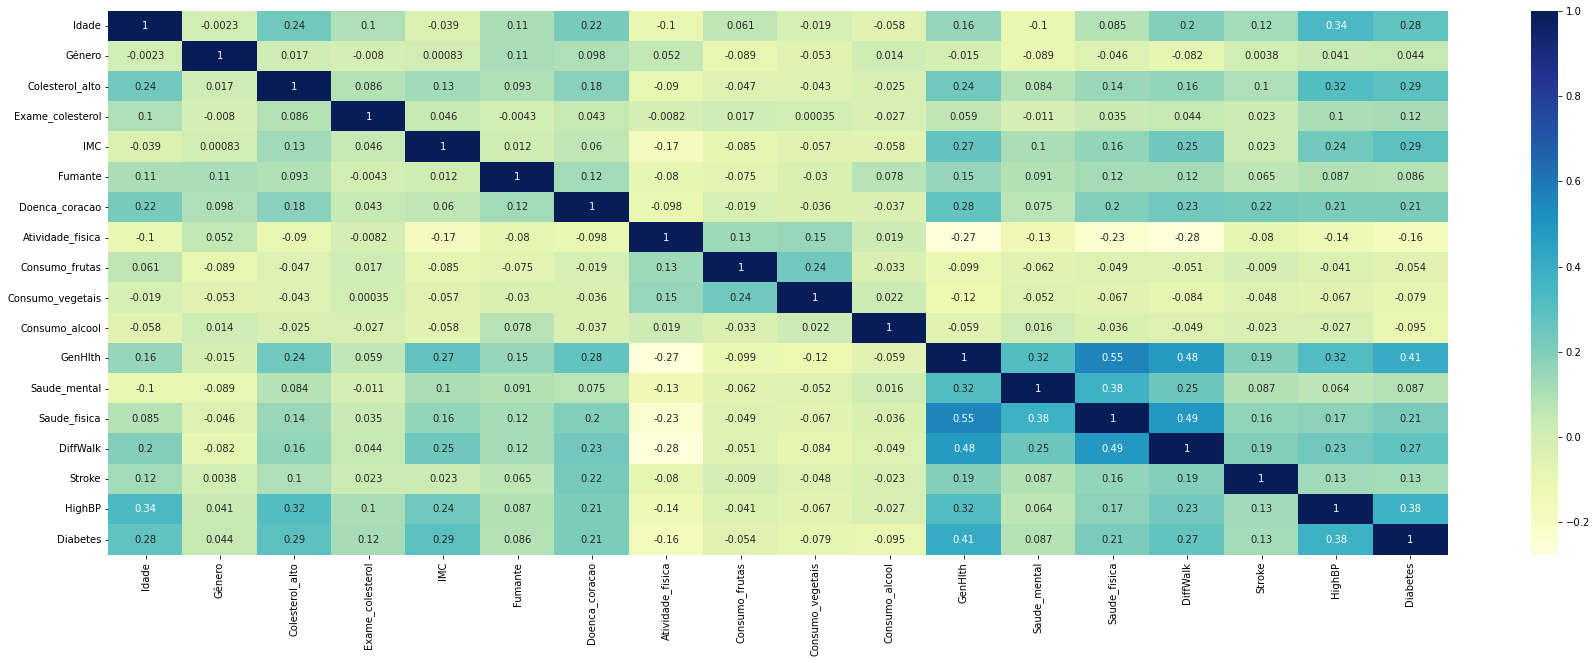

In [56]:
plt.figure(figsize=(30, 10))
dataplot = sns.heatmap(diabetes.corr(), cmap="YlGnBu", annot= True)
plt.show()

Com base nas correlações vemos que as hipóteses aparentam estar certas e que ainda existem outras variáveis com alta correlação com a diabetes - DiffWalk, Stroke e HighBP

<Figure size 3600x720 with 0 Axes>

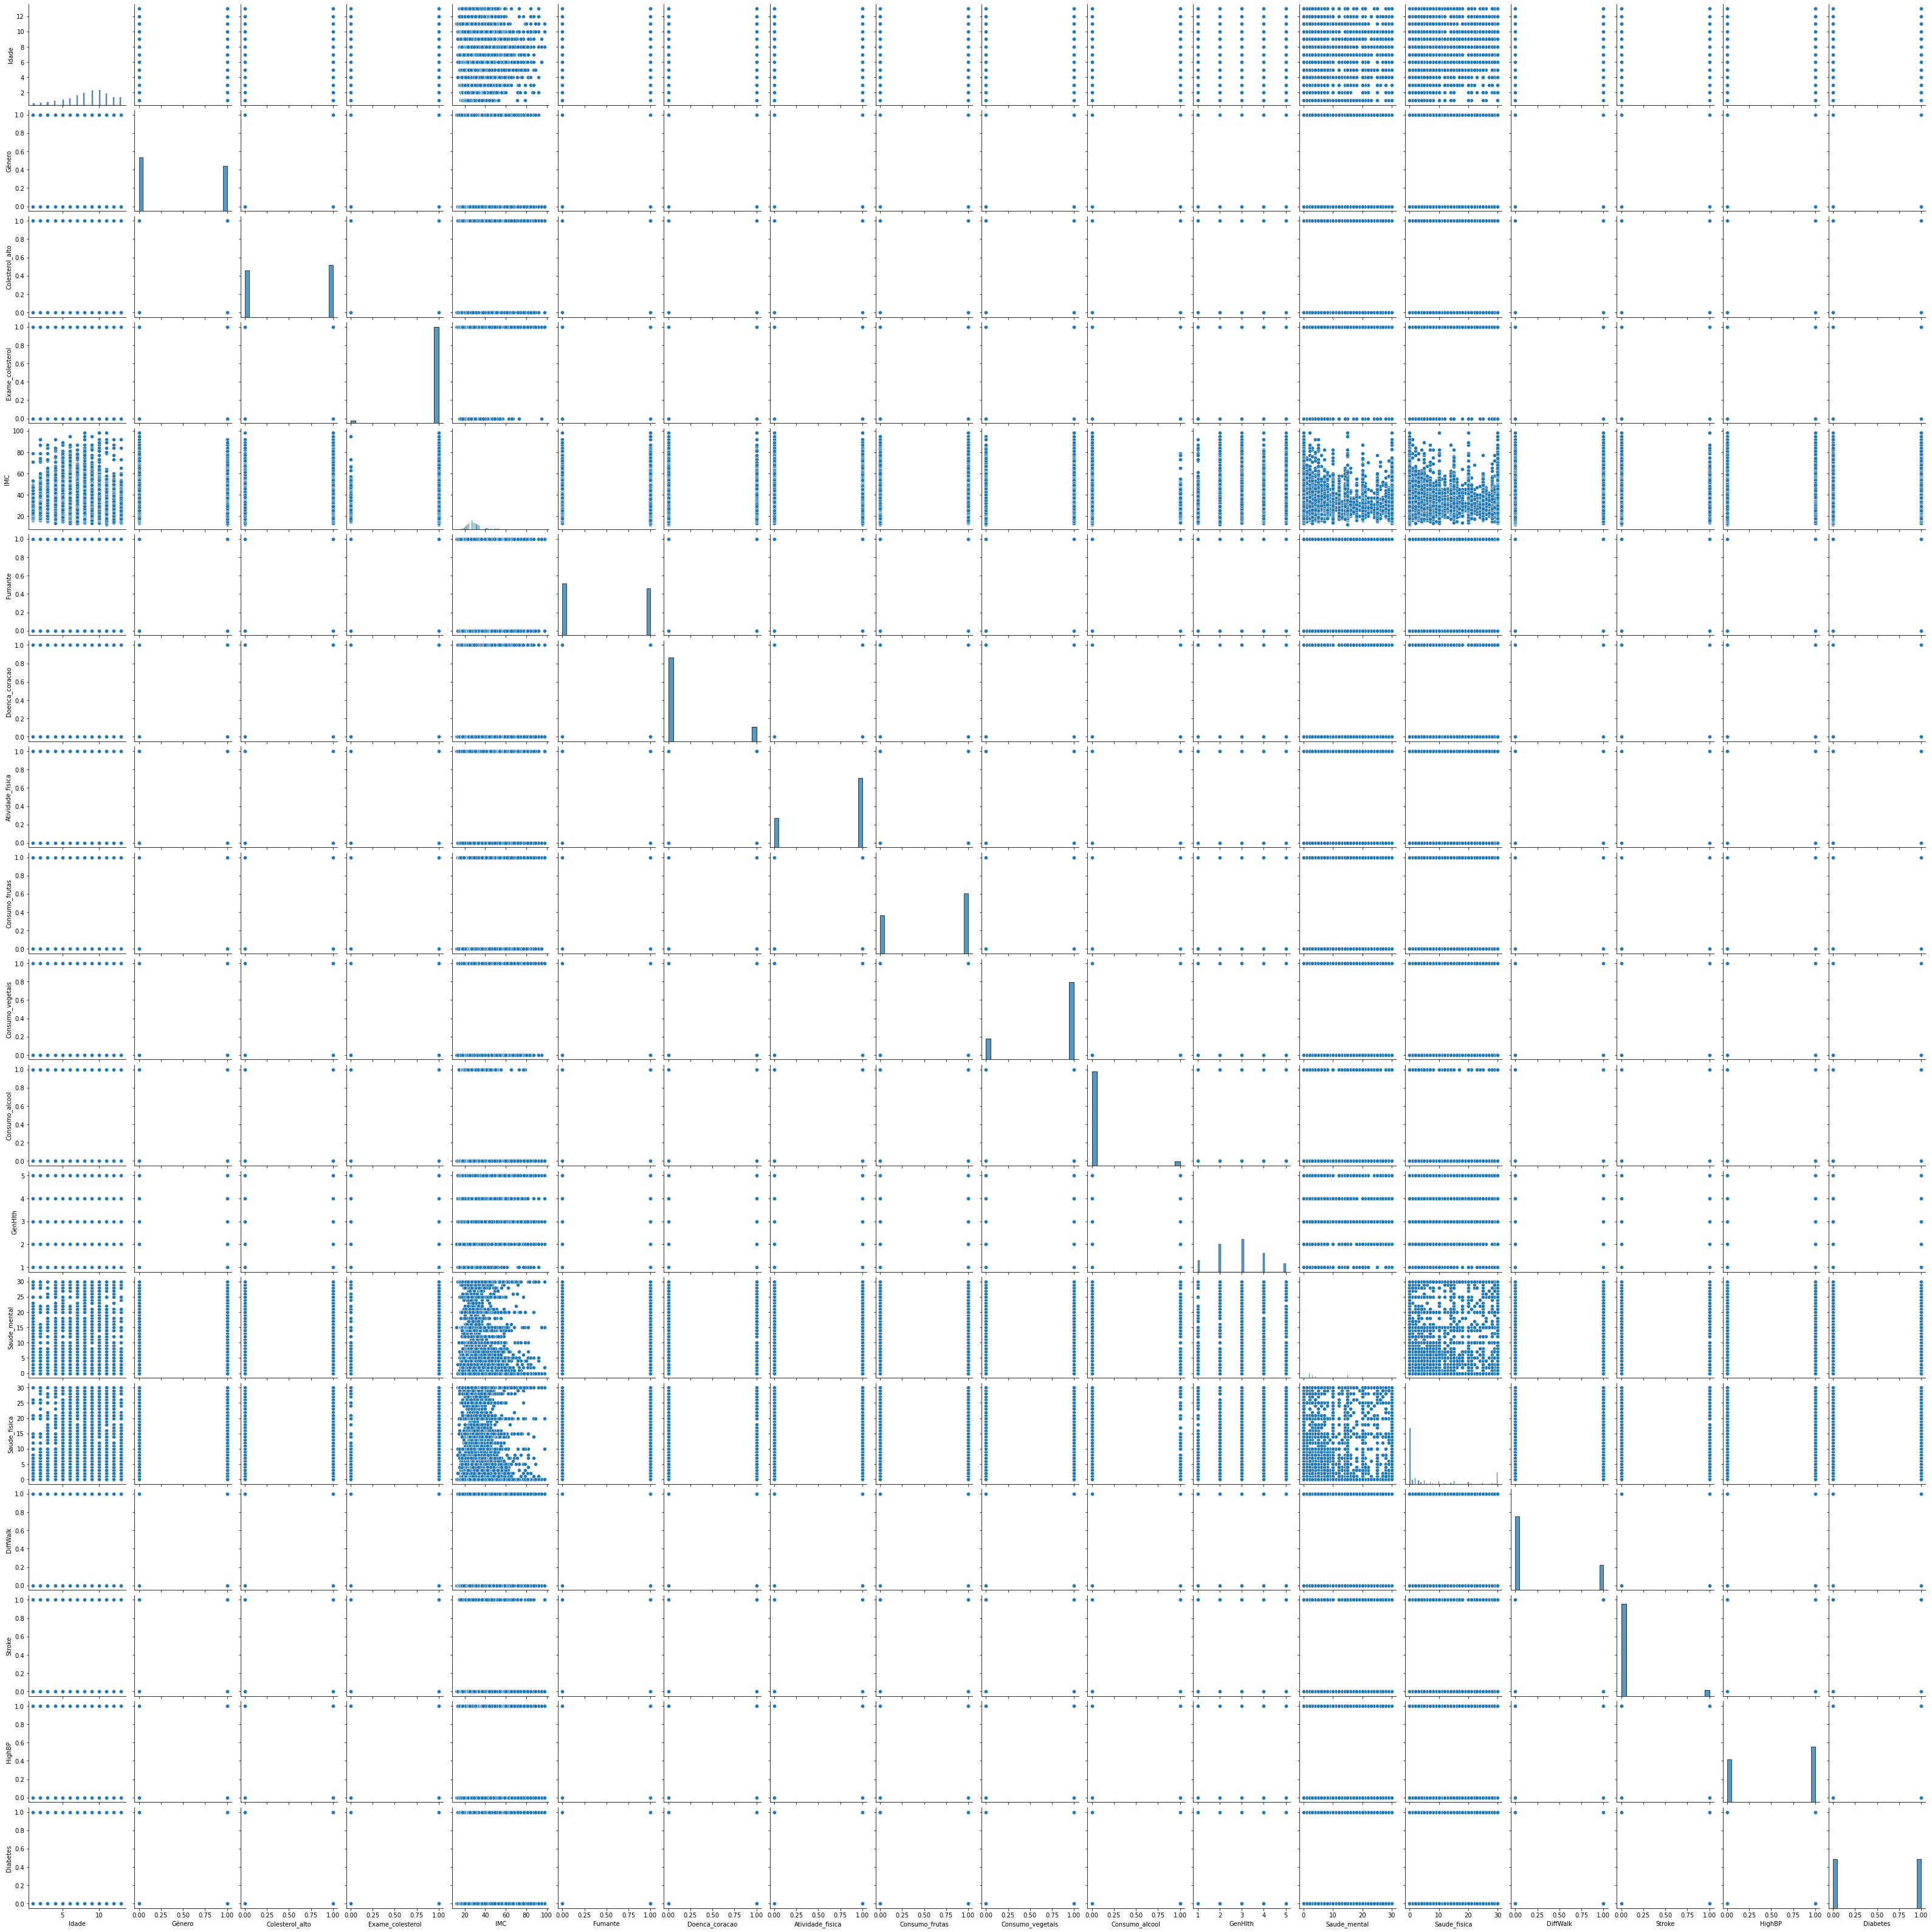

In [58]:
plt.figure(figsize=(50, 10))
sns.pairplot(diabetes)
plt.show()